In [16]:
# Allow us to plot plots in our little windows
%matplotlib inline

In [17]:
import os
from textblob import TextBlob
import matplotlib.pyplot as plt

In [18]:
def load_lyrics(filename):
    if filename[-4:]!='.txt': filename = filename + '.txt'    
    f = open(os.path.join('..','Lyrics',filename))
    lyrics = f.read()
    f.close
    return lyrics

In [19]:
def measure_sentiment(lyrics,verbose=False):
    TB = TextBlob(lyrics)
    p = TB.sentiment.polarity
    s = TB.sentiment.subjectivity
    if verbose:
        print('Positivity:   %.3f' %(p))
        print('Subjectivity: %.3f' %(s))
    return p, s

In [20]:
# Analyze the sentiment for each artist in the Lyrics directory
import numpy as np

artists = os.listdir('../Lyrics/')
artist_scores = {}
N = len(artists)
X = np.zeros((N,1))
Y = np.zeros((N,1))
names = []
i=0
for artist in artists:
    lyrics = load_lyrics(artist)
    names.append(artist.split('Lyrics_')[1].split('.txt')[0])
    print('\n'+names[i])
    artist_scores[names[i]] = measure_sentiment(lyrics)
    X[i] = artist_scores[names[i]][0] # Store for plotting
    Y[i] = artist_scores[names[i]][1]    
    i+=1   


AndyShauf

ChanceTheRapper

Common

GucciMane

IceCube

Jay-Z

KanyeWest

LilWayne

MosDef

Q-Tip

TalibKweli

TheBeatles

TheNotoriousBIG

Tupac

VicMensa

WarrenG


## Sentiment Analysis

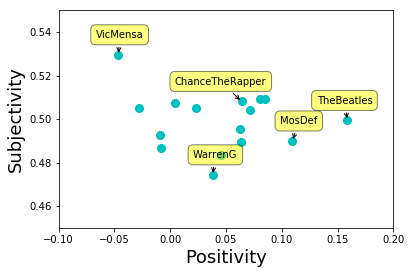

In [21]:
# Plot each artist's positivity and subjectivity scores
plt.plot(X,Y,'co',markersize=8)
plt.xlim((-0.1, 0.2)); plt.ylim((0.45, 0.55))
plt.xlabel('Positivity',fontsize=18)
plt.ylabel('Subjectivity',fontsize=18)

label_names = ['TheBeatles','WarrenG','ChanceTheRapper','VicMensa','MosDef']

for name in label_names:
    plt.annotate(
        name, xy=(artist_scores[name]), xytext=(25,15),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.show()